### Importing Packages

In [ ]:
from fugacity_coeff import fugacity_scf
from mixing_parameters import a_mix, a_PRK, alpha, b_mix, b_PRK, a_star, b_star
from Z_prk import Z_PRK
from P_sat import P_sat
from find_solubility import find_solubility

from ANN.evaluate_model import evaluate_model, plot_predictions, model_predictions

In [ ]:
import numpy as np 
import sympy as sp
from sympy import pi
from sympy.abc import i
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from IPython.display import display
from sympy.interactive import init_printing
init_printing(use_latex=True)
from sympy import pprint

### Inputs

#### Temperature and Pressure Inputs

In [ ]:
P_num = np.arange(start=100000, stop=20000000, step=200000)
T_num = 313.15 # in Kelvins
R_num = 8.314 #Pa . m3 . mol-1 . K-1

In [ ]:
k_num = np.array([0, 0.1], [0.1, 0])
l_num = np.array([0, 0], [0, 0])

#### Naphtalene Properties

In [ ]:
from openpyxl import load_workbook, Workbook

wb1 = load_workbook('Joback_Method.xlsx', data_only=True)
ws1 = wb1.active
# T_c_naph = ws1['G36'].value # in Kelvin
# P_c_naph = ws1['G37'].value / 10 # in MPa
# V_c_naph = ws1['G38'].value # in cm³/mol
# w_naph = ws1['G40'].value


In [ ]:
T_c_naph = 748.4
P_c_naph = 4050000
w_naph = 0.3020

In [ ]:
v_solid_num = 128.6/10**(6) # cm^3/mol
A_num = 28.1249 #|
B_num = 6738.77 #| Antoine Constants
C_num = -35.818 #|

In [ ]:
P_sat(A_num, B_num, C_num, T_num)

In [ ]:
P_sub_num = P_sat(A_num, B_num, C_num, T_num)

#### CO2 Properties

In [ ]:
T_c_co2 = 304.25
P_c_co2 = 7377300 # Pa
w_co2 = 0.225

### Calculations

#### Mixing Parameters

In [ ]:
alpha_co2 = alpha(w_co2, T_num, T_c_co2)
alpha_naph = alpha(w_naph, T_num, T_c_naph)

a_PRK_CO2 = a_PRK(P_c_co2, T_c_co2, R_num) * alpha_co2
a_PRK_naph = a_PRK(P_c_naph, T_c_naph, R_num) * alpha_naph

b_PRK_CO2 = b_PRK(P_c_co2, T_c_co2, R_num)
b_PRK_naph = b_PRK(P_c_naph, T_c_naph, R_num)

# print(alpha_co2, alpha_naph, a_PRK_CO2, a_PRK_naph, b_PRK_CO2, b_PRK_naph)

In [ ]:
# a_mix_num = a_mix(0.0004647937415814252, 1-0.0004647937415814252, a_PRK_naph, a_PRK_CO2, k_num, disp=True)
# b_mix_num = b_mix(0.0004647937415814252, 1-0.0004647937415814252, b_PRK_naph, b_PRK_CO2, l_num, disp=True)


# a_s_num = a_star(0.000459, 1-0.000459, a_PRK_naph, a_PRK_CO2, k_num, disp=True)
# b_s_num = b_star(0.000459, 1-0.000459, b_PRK_naph, b_PRK_CO2, k_num, disp=True)



#### Solving PRK EOS for Z

In [ ]:
# Z_num = Z_PRK(23430000, T_num, R_num, a_mix_num, b_mix_num)
# Z_num

#### Calculating the fugacity coefficient

In [ ]:
# ln_phi_scf_num = fugacity_scf(0.1, R_num, T_num, Z_num[0], a_mix_num, b_mix_num)

In [ ]:
# y_sol = y_ideal[0]*np.exp(v_solid * (P_num[0] - P_sub_num)/(R_num*T_num))/np.exp(ln_phi_scf_num)

#### Solubility

In [ ]:
# P, R, T, P_sub, v_solid, y_naph, phi_scf = sp.symbols('P R T P_sub v_solid y_naph phi_scf')

# y_naph_1 = (P_sub/P) * sp.exp(v_solid * (P-P_sub) / (R*T)) / phi_scf

# display(y_naph_1)

In [ ]:
find_solubility(v_solid_num, 20000000, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_naph, b_PRK_CO2, b_PRK_naph, k_num, l_num, disp=True)

Enhancement Factor: 8768.506063394125 
Poynting Correction: 2.685555492282533
Fugacity: 0.00030627286710719395
Z= 0.4057592194559788
[2.294698327556627e-06, 0.01451957793279318, 0.02012107619884064]
0.02012107619884064
Enhancement Factor: 9847.118887574108 
Poynting Correction: 2.685555492282533
Fugacity: 0.0002727249993570591
Z= 0.40568920922752366
[2.294698327556627e-06, 0.01451957793279318, 0.02012107619884064, 0.022596167242567577]
0.022596167242567577
Enhancement Factor: 10348.06094050375 
Poynting Correction: 2.685555492282533
Fugacity: 0.0002595225818366507
Z= 0.4057411344024085
[2.294698327556627e-06, 0.01451957793279318, 0.02012107619884064, 0.022596167242567577, 0.02374567813362801]
0.02374567813362801
Enhancement Factor: 10585.777612211961 
Poynting Correction: 2.685555492282533
Fugacity: 0.00025369468268296355
Z= 0.40578165172187325
[2.294698327556627e-06, 0.01451957793279318, 0.02012107619884064, 0.022596167242567577, 0.02374567813362801, 0.02429116618262917]
0.02429116618

In [ ]:
y_solubility = []
for i in P_num:
    y_final = find_solubility(v_solid_num, i, P_sub_num, R_num, T_num, a_PRK_CO2, a_PRK_naph, b_PRK_CO2, b_PRK_naph)
    y_solubility.append(y_final)

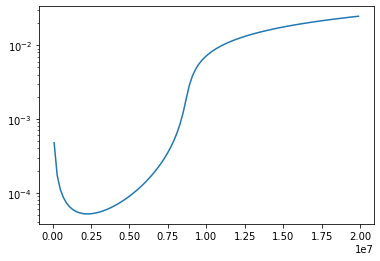

In [ ]:
plt.yscale("log")
plt.plot(P_num, y_solubility)

In [ ]:
df = pd.DataFrame(y_solubility)
df.to_excel('y_naph_PRK.xlsx')

### Compare solubilities obtained by ANN model and PRK EOS

In [ ]:
df1 = pd.read_excel('y_naph_PRK.xlsx')

In [ ]:
y_naph_PRK = df1[0].values

In [ ]:
y_ANN = model_predictions('ANN\solubility_model.csv')

In [ ]:
evaluate_model(y_ANN, y_naph_PRK)

Mean Error = 0.007554463542787683 
Max Error = 0.019996836282403955
Min Error = 0.00023714377560546504
Standard Deviation = 0.0069007341961192115


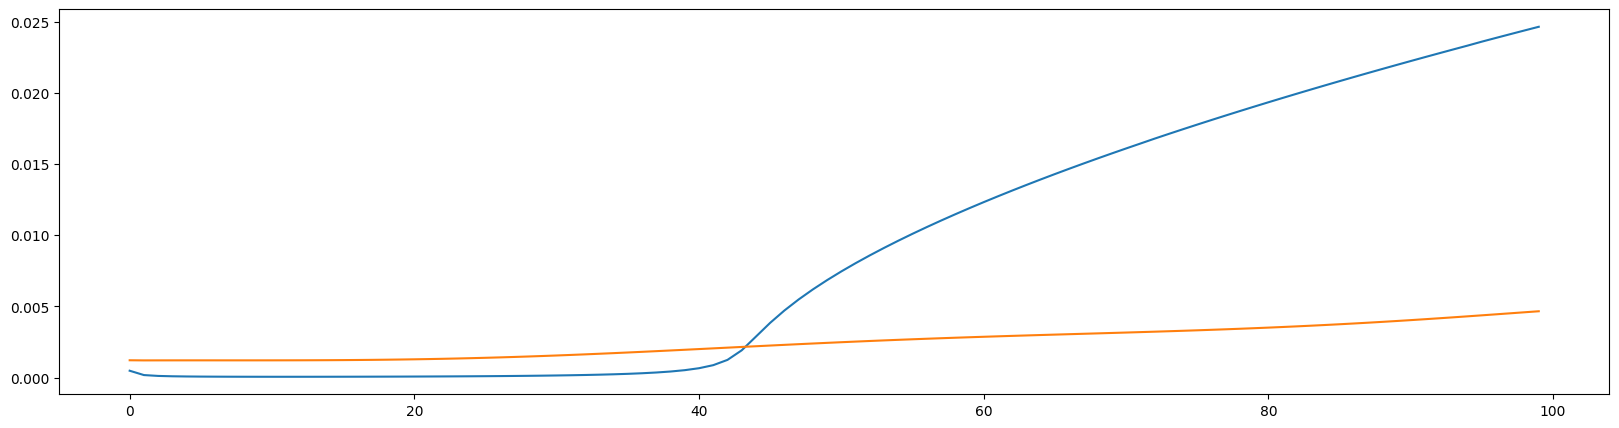

In [ ]:
plot_predictions(y_ANN, y_naph_PRK)